In [285]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def iterate_map(f, x_0, n):
    # extended for multi-dim case
    # trajectory = [x_0] * (n+1)
    trajectory = np.stack([x_0] * (n+1), axis=0)
    trajectory[0] = x_0
    for i in range(1, n + 1):
        trajectory[i] = f(*trajectory[i-1])
    
    return trajectory

In [286]:
henon = lambda a, b: lambda x, y: np.asarray((a - (x**2) + b * y, x))

In [287]:
def problem_4(a):
    iterations = 500
    trajectory = iterate_map(henon(a, 0.4), np.asarray((0.8, 0.8)), iterations)
    
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    axes[0].set_ylabel('$x_n$')
    axes[1].set_ylabel('$y_n$')
    axes[1].set_xlabel('n')
    axes[0].scatter(np.arange(iterations + 1), trajectory[:,0], s=2)
    axes[1].scatter(np.arange(iterations + 1), trajectory[:,1], s=2)
    
    fig.suptitle('Trajectories for $a={0}$'.format(a), y=0.93)
    
    fig.show()
    
#     return trajectory

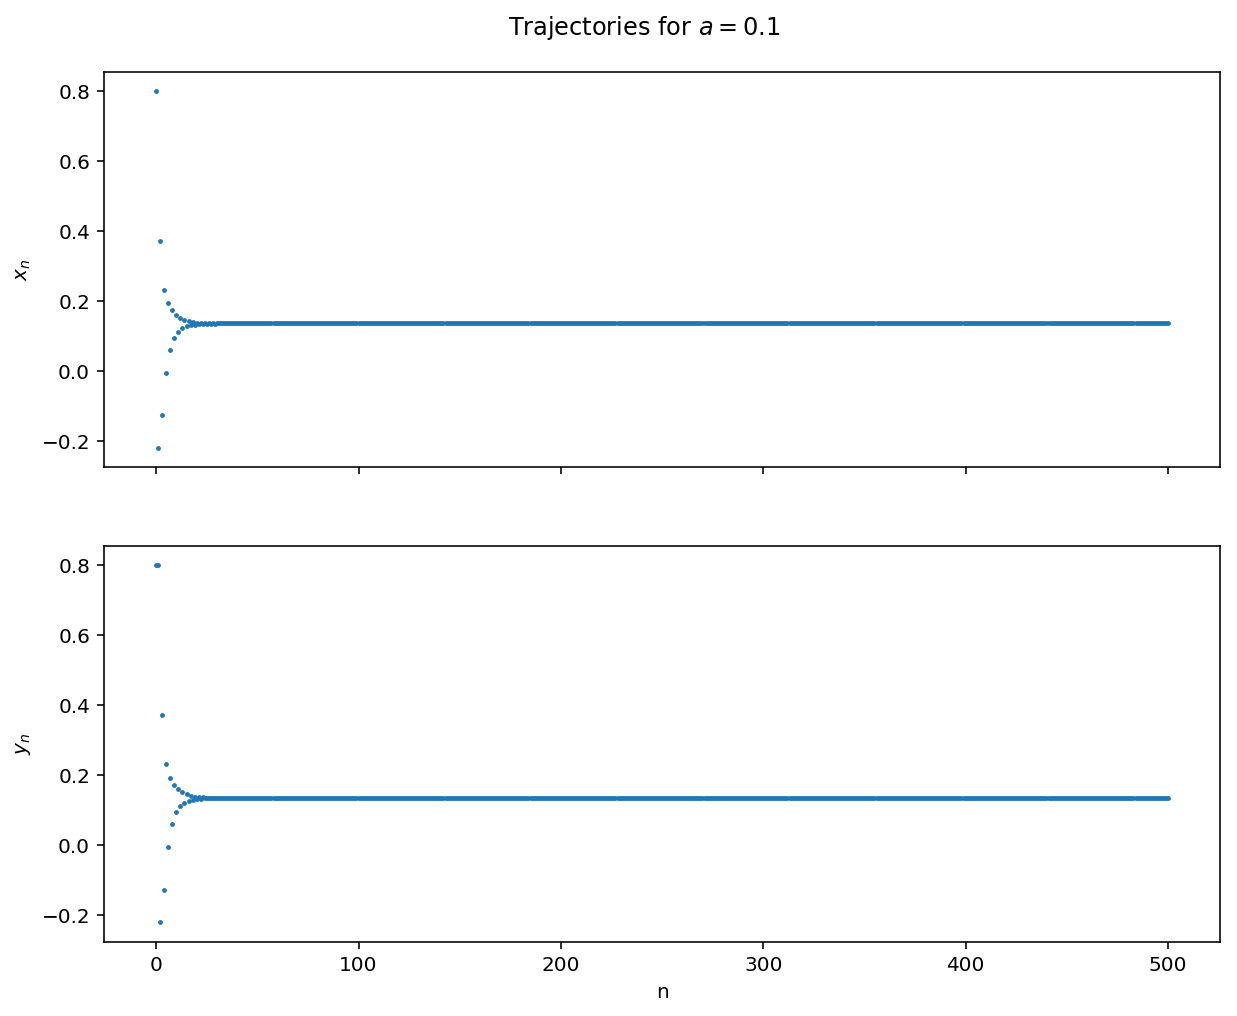

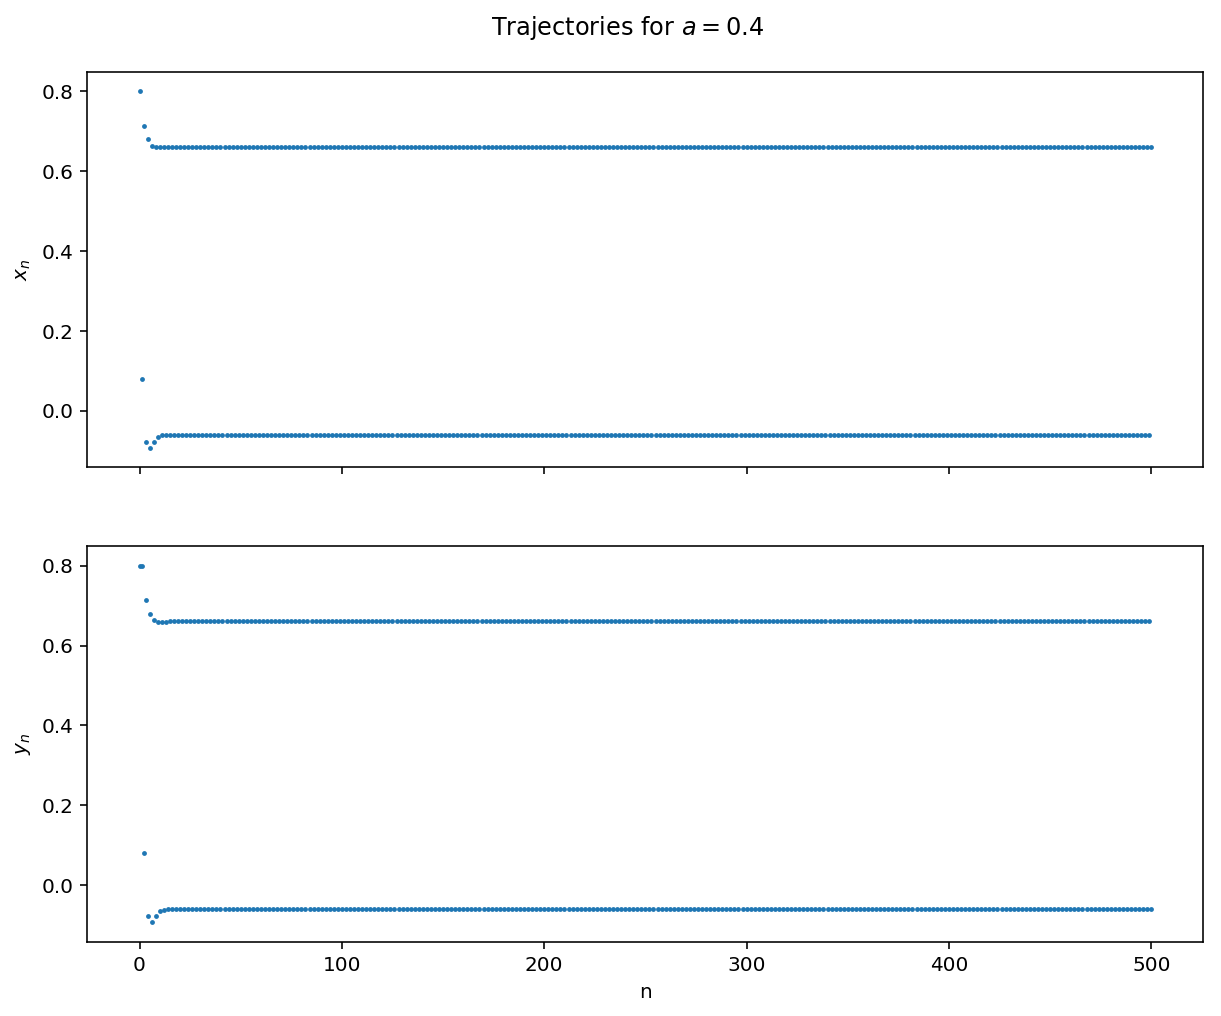

In [288]:
problem_4(0.1)
problem_4(0.4)

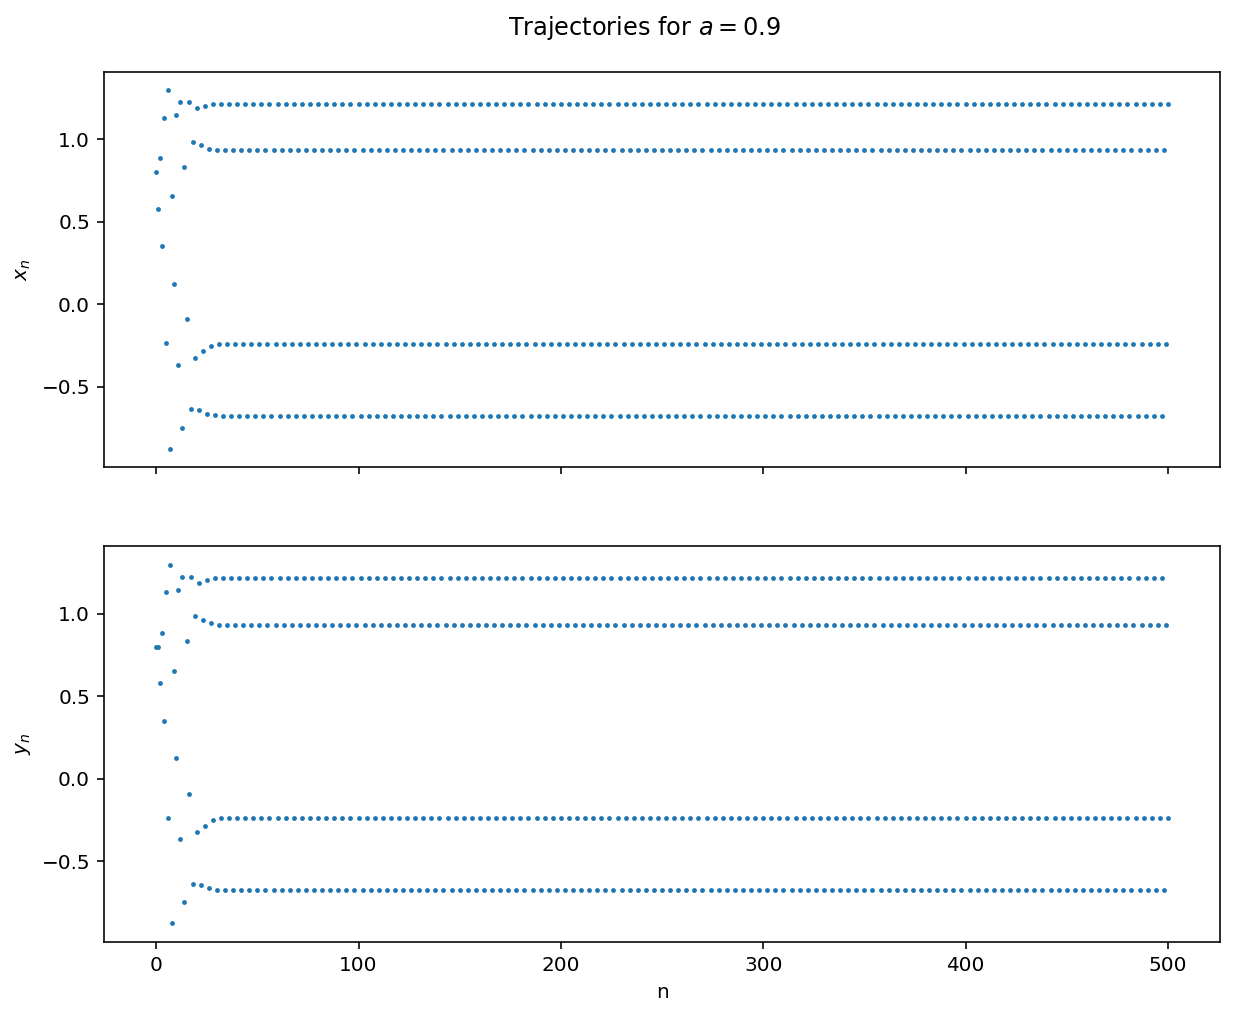

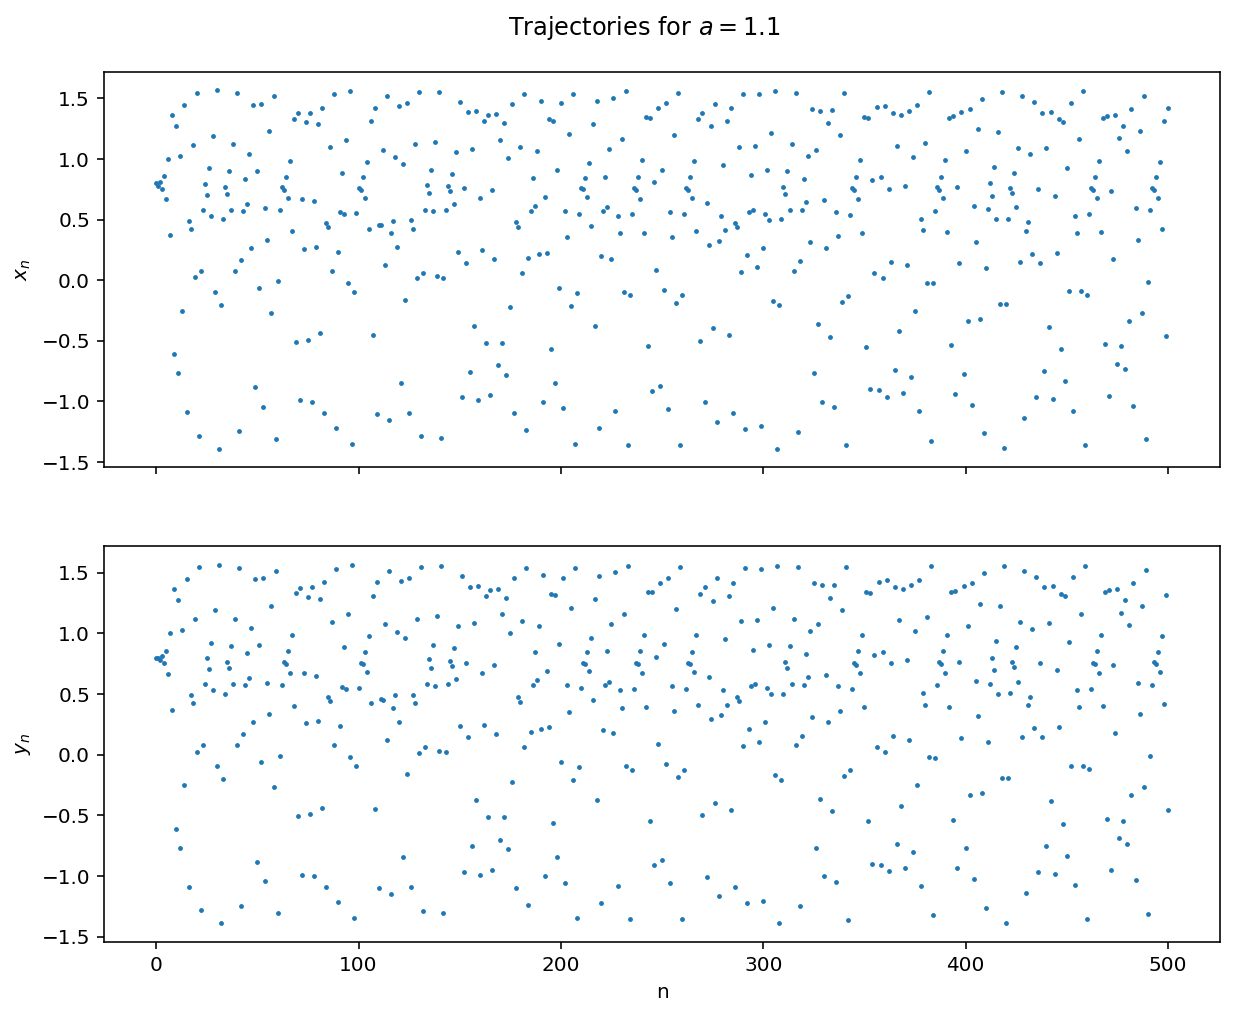

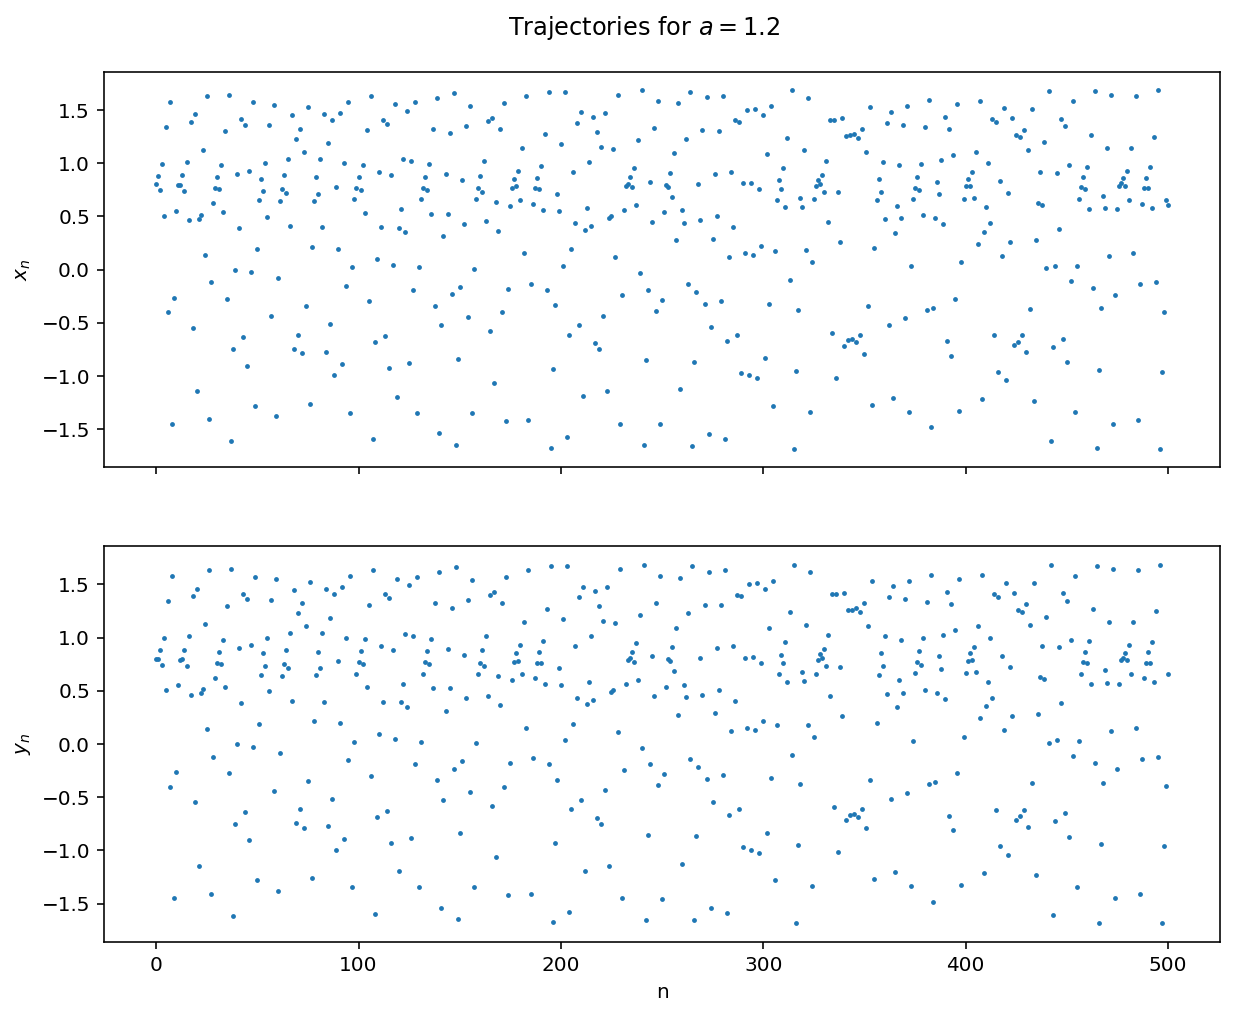

In [289]:
problem_4(0.9)
problem_4(1.1)
problem_4(1.2)

In [173]:
import math

def problem_5():
    b = 0.4
    for a in np.linspace(0.1, 0.4, 1000):
    # find where the abs value of eigenvalues = 1
        x_right = (b - 1 + math.sqrt(((1 - b) ** 2) + (4 * a))) / 2
        eigenvalue_minus = (-x_right) - math.sqrt((x_right**2) + b)
        eigenvalue_plus = (-x_right) + math.sqrt((x_right**2) + b)

        if eigenvalue_minus < -1 or eigenvalue_plus < -1:
            print(eigenvalue_minus, eigenvalue_plus)
            return a

In [174]:
problem_5()

-1.000321719518737 0.3998713535805693


0.2702702702702703

In [291]:
def problem_6():
    iterations = 1000
    b = 0.4
    x_0 = np.asarray((0.8, 0.8))
    fig, axes = plt.subplots(2, 1, figsize=(10, 16))
    
    for a in np.linspace(0.1, 1.2, 100):
        trajectory = iterate_map(henon(a, b), x_0, iterations) # 1000 iterates at a = ___
        axes[0].scatter([a] * (int(iterations / 2) + 1), trajectory[int(iterations / 2):, 0], s=1)
        axes[1].scatter([a] * (int(iterations / 2) + 1), trajectory[int(iterations / 2):, 1], s=1)
    
    axes[0].set_xlabel('a')
    axes[1].set_xlabel('a')
    
    axes[0].set_ylabel('iterates 500 to 1000 of $x_n$')
    axes[1].set_ylabel('iterates 500 to 1000 of $y_n$')
    
    fig.show()

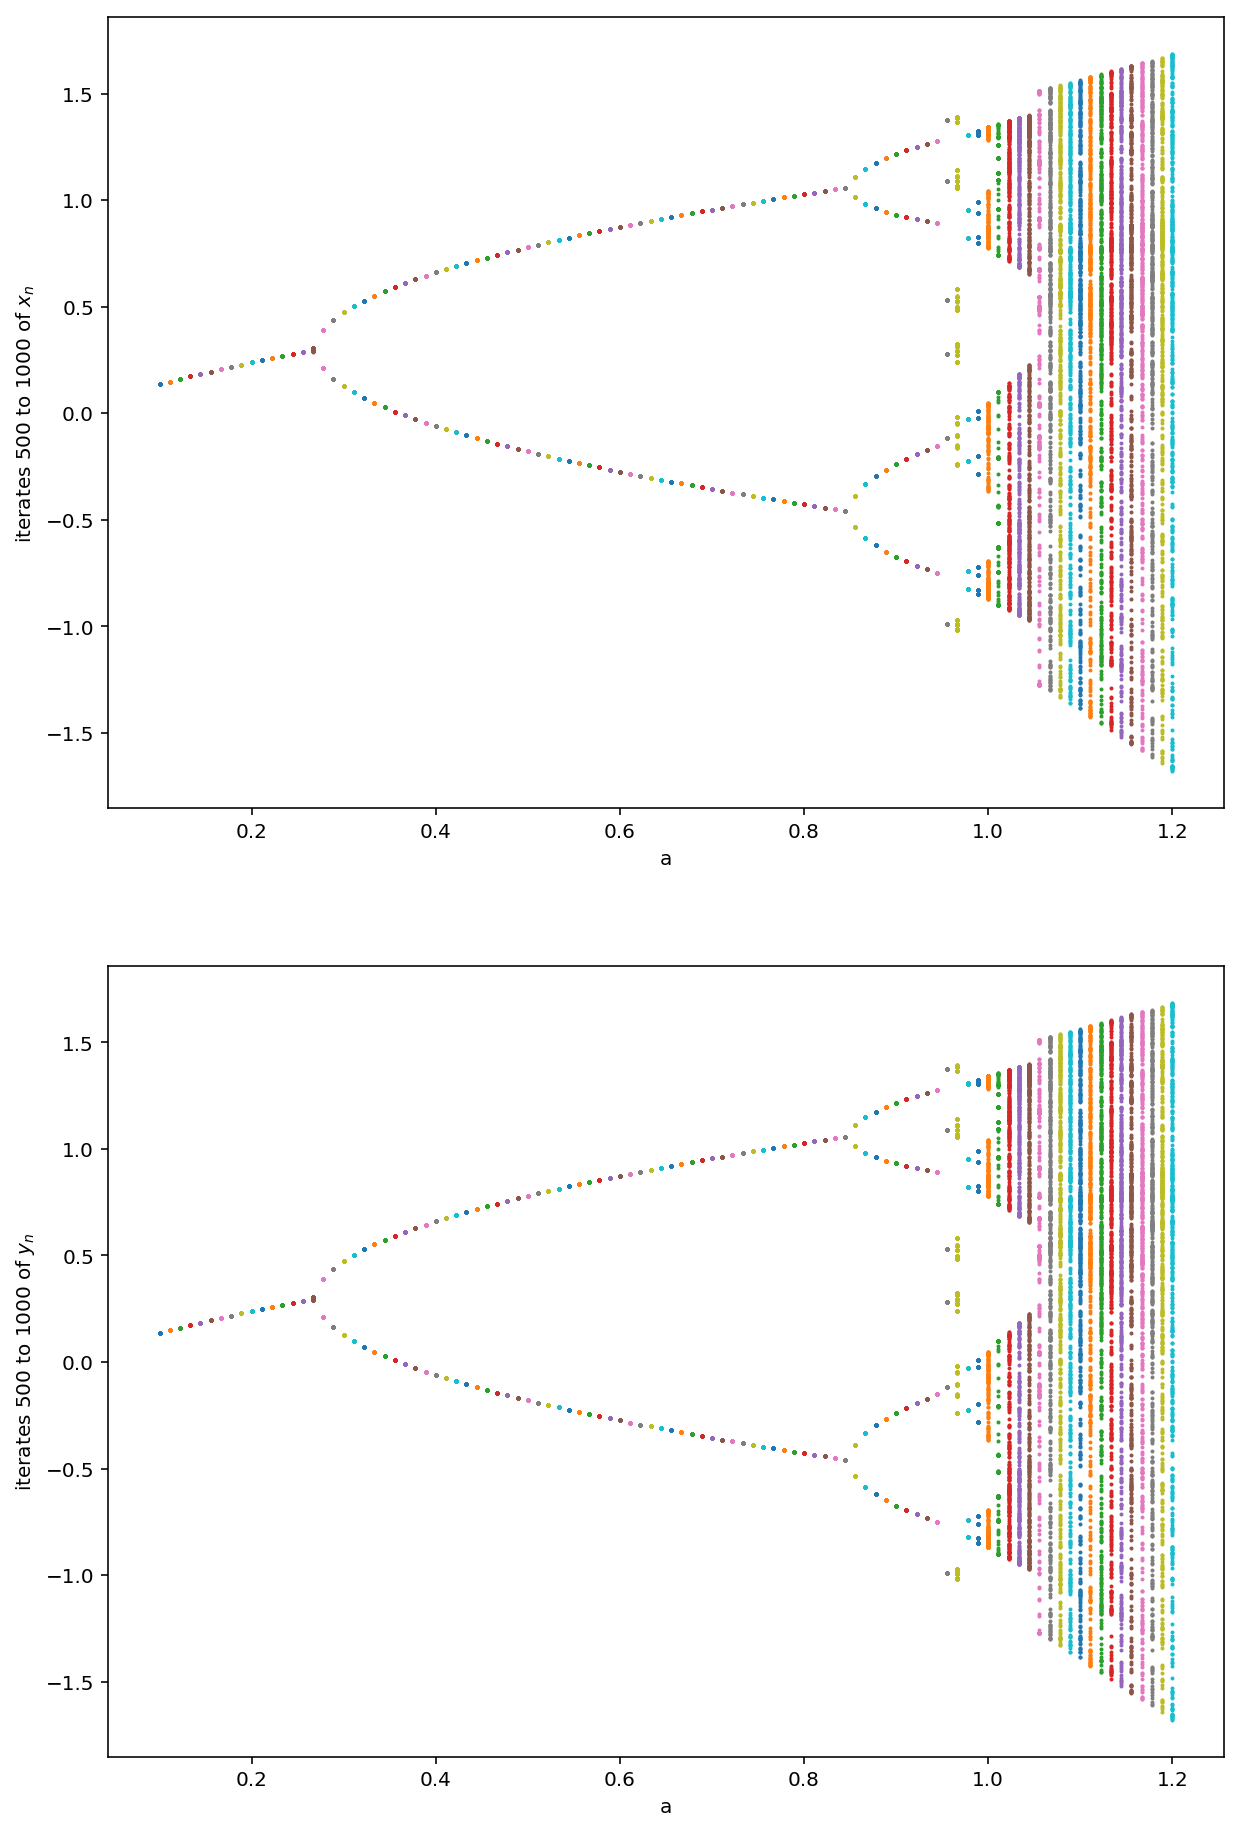

In [292]:
problem_6()

In [452]:
def theta_circle(theta, radius=1):
    return [radius * np.cos(theta), radius * np.sin(theta)]

def part_2_problem_1():
    fig, axes = plt.subplots(2, 1, figsize=(10, 16))
    axes[0].set_aspect('equal')
    axes[0].grid(True)
    
    g = lambda x, y: (2 * x, 0.5 * y + (x**2))
    unit_circle = theta_circle(np.linspace(0, 2 * math.pi, 1000))
    g_circle = np.apply_along_axis(
        lambda row: iterate_map(g, row, 1)[-1],
        0, 
        unit_circle
    )

    axes[0].plot(unit_circle[0], unit_circle[1])
    axes[0].plot(g_circle[0], g_circle[1])

    g7_circle = np.apply_along_axis(
        lambda row: iterate_map(g, row, 7)[-1],
        0, 
        unit_circle
    )
        
    axes[1].plot(g7_circle[0], g7_circle[1])
    
    g_inv = lambda x, y: (x / 2, (2 * y) - ((x**2) / 2))
    g7_inv_circle = np.apply_along_axis(
        lambda row: iterate_map(g_inv, row, 7)[-1],
        0, 
        unit_circle
    )
    
    axes[1].plot(g7_inv_circle[0], g7_inv_circle[1])
    


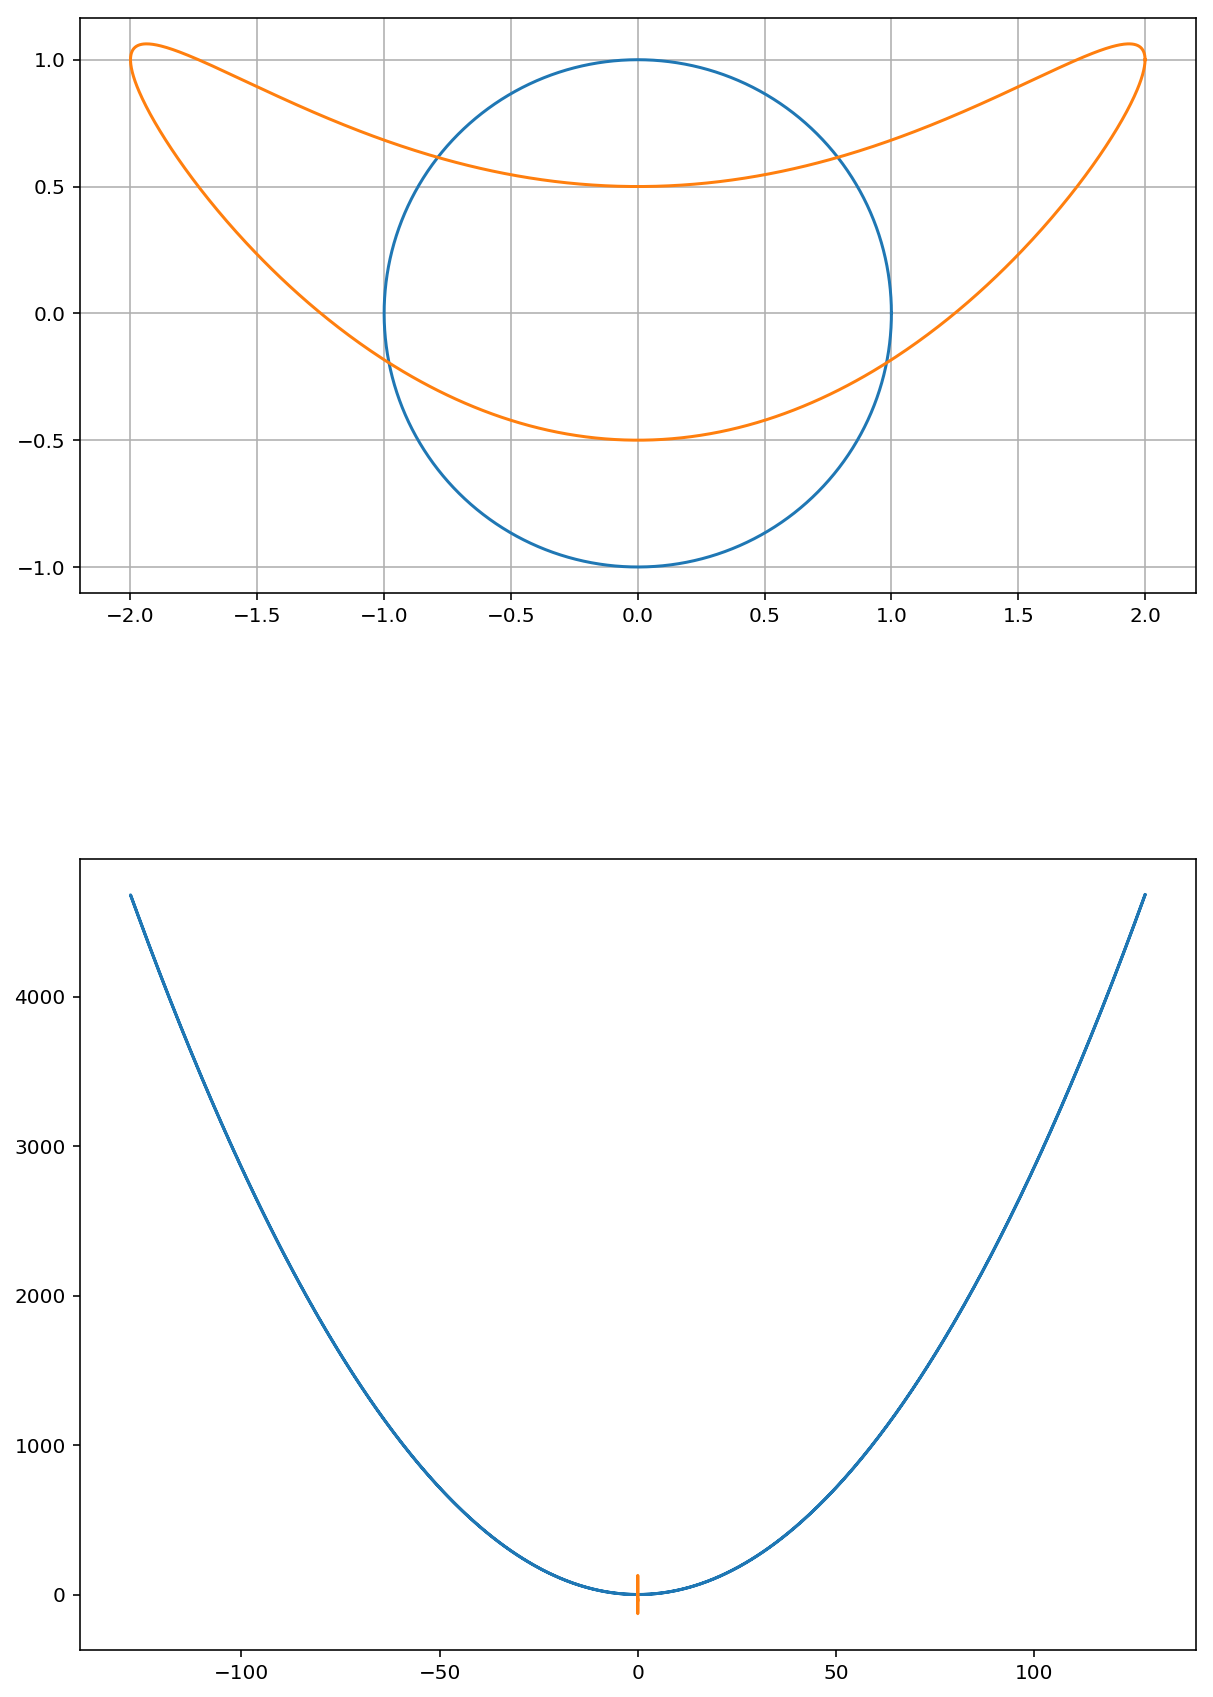

In [453]:
part_2_problem_1()

In [454]:
def part_2_problem_2():
    f = henon(0.4, 0.4)
    circle = theta_circle(np.linspace(0, 2 * math.pi, 1000), 0.1)
    
    fig, ax = plt.subplots(figsize=(10, 16))
    ax.set_aspect('equal')
    ax.grid(True)
    
    fp_x = 0.4
    fp_y = fp_x
    ax.plot(circle[0] + fp_x, circle[1] + fp_y)
    
    f20_circle = np.apply_along_axis(
        lambda row: iterate_map(f, row, 20)[-1],
        0, 
        [circle[0] + fp_x, circle[1] + fp_y] # circle with center at f.p.
    )
    
    ax.scatter(f20_circle[0], f20_circle[1], s=1)
    
    

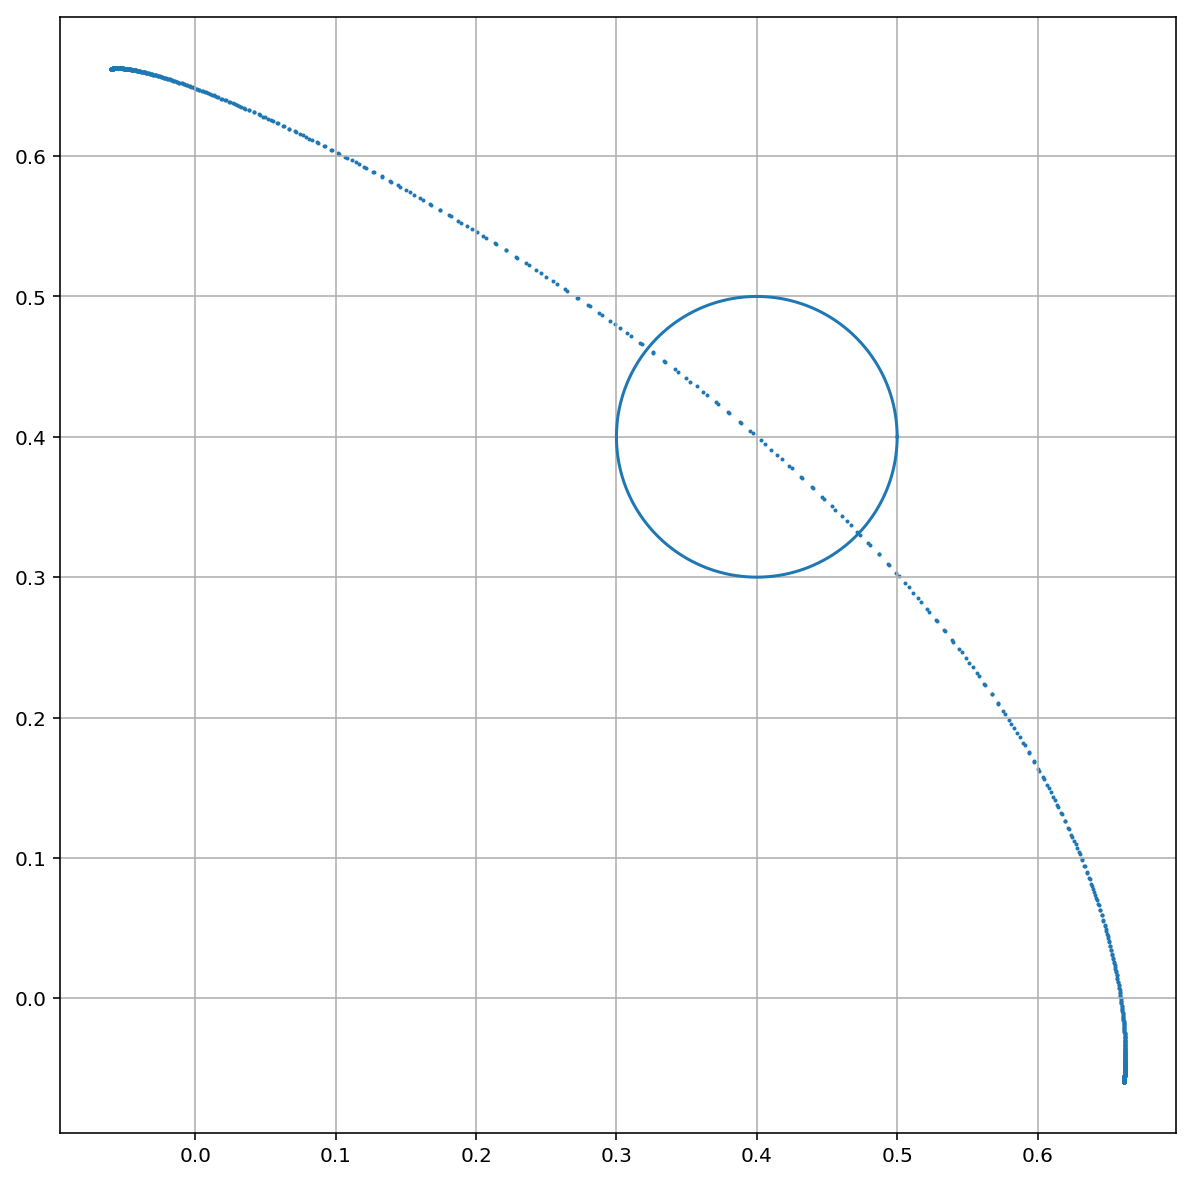

In [455]:
part_2_problem_2()